# **Task 3: Linear Regression for sales prediction**

**Now in this task we will build an simple linear regression performing some feature engineering and normalisation**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading data  
df = pd.read_csv(r'C:\Users\HP\Desktop\train.csv')
print(df.head())

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0


In [3]:
print(df.dtypes)

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object


In [37]:
df['date'] = pd.to_datetime(df['date'])
df['year'] =df['date'].dt.year
df['day'] = df['date'].dt.dayofyear
print(df.head(10))
print(df.tail(10))

   id       date  store_nbr        family  sales  onpromotion  year  month  \
0   0 2013-01-01          1    AUTOMOTIVE    0.0            0  2013      1   
1   1 2013-01-01          1     BABY CARE    0.0            0  2013      1   
2   2 2013-01-01          1        BEAUTY    0.0            0  2013      1   
3   3 2013-01-01          1     BEVERAGES    0.0            0  2013      1   
4   4 2013-01-01          1         BOOKS    0.0            0  2013      1   
5   5 2013-01-01          1  BREAD/BAKERY    0.0            0  2013      1   
6   6 2013-01-01          1   CELEBRATION    0.0            0  2013      1   
7   7 2013-01-01          1      CLEANING    0.0            0  2013      1   
8   8 2013-01-01          1         DAIRY    0.0            0  2013      1   
9   9 2013-01-01          1          DELI    0.0            0  2013      1   

   week  day  holiday  
0     1    1        0  
1     1    1        0  
2     1    1        0  
3     1    1        0  
4     1    1        0

**so from the dataset we will only select one family type, one particular store and we target to predict the future sales for that particular family. we will use date and promotions as the major feature.**

In [221]:
df1 = df[(df['store_nbr'] == 3) & (df['family'] == 'PERSONAL CARE')]
print(df1.head(10))

          id       date  store_nbr         family  sales  onpromotion  year  \
751      751 2013-01-01          3  PERSONAL CARE    0.0            0  2013   
2533    2533 2013-01-02          3  PERSONAL CARE  623.0            0  2013   
4315    4315 2013-01-03          3  PERSONAL CARE  382.0            0  2013   
6097    6097 2013-01-04          3  PERSONAL CARE  426.0            0  2013   
7879    7879 2013-01-05          3  PERSONAL CARE  657.0            0  2013   
9661    9661 2013-01-06          3  PERSONAL CARE  862.0            0  2013   
11443  11443 2013-01-07          3  PERSONAL CARE  433.0            0  2013   
13225  13225 2013-01-08          3  PERSONAL CARE  356.0            0  2013   
15007  15007 2013-01-09          3  PERSONAL CARE  357.0            0  2013   
16789  16789 2013-01-10          3  PERSONAL CARE  279.0            0  2013   

       month  week  day  holiday  
751        1     1    1        0  
2533       1     1    2        0  
4315       1     1    3  

**dropping id, store_nbr, family**

In [222]:
df1 =df1.drop(columns=['id', 'store_nbr', 'family', 'date' ])
print(df1.head(20))

       sales  onpromotion  year  month  week  day  holiday
751      0.0            0  2013      1     1    1        0
2533   623.0            0  2013      1     1    2        0
4315   382.0            0  2013      1     1    3        0
6097   426.0            0  2013      1     1    4        0
7879   657.0            0  2013      1     1    5        0
9661   862.0            0  2013      1     1    6        0
11443  433.0            0  2013      1     2    7        0
13225  356.0            0  2013      1     2    8        0
15007  357.0            0  2013      1     2    9        0
16789  279.0            0  2013      1     2   10        0
18571  284.0            0  2013      1     2   11        0
20353  445.0            0  2013      1     2   12        0
22135  585.0            0  2013      1     2   13        0
23917  311.0            0  2013      1     3   14        0
25699  269.0            0  2013      1     3   15        0
27481  420.0            0  2013      1     3   16       

In [223]:
df['holiday'] = df['day'].apply(lambda x: 1 if x==0 else 0)
print(df['holiday'].count())

3000888


# **when i used the year, holiday, day, onpromotion as feature the model works very bad with r2 scoe < 0 (useless model)** 

* RMSE: 214.16776261094824
* MAE : 182.00181426897933
* R2 score : -0.09819878810969063

**because sales maynot always increase linearly with year-by-year**  
**there was no memory -> sales depend heavily on previous day's sales.**
**I gave the model time Labels not behaviour** 
**so again i am adding new featres and fixing the model**

In [224]:
df1['sales_lag_1'] = df1['sales'].shift(1)
df1['sales_lag_7'] = df1['sales'].shift(7)
df1['sales_lag_14'] = df1['sales'].shift(14)
df1 = df1.dropna()
print(df1.head())

       sales  onpromotion  year  month  week  day  holiday  sales_lag_1  \
25699  269.0            0  2013      1     3   15        0        311.0   
27481  420.0            0  2013      1     3   16        0        269.0   
29263  334.0            0  2013      1     3   17        0        420.0   
31045  259.0            0  2013      1     3   18        0        334.0   
32827  533.0            0  2013      1     3   19        0        259.0   

       sales_lag_7  sales_lag_14  
25699        356.0           0.0  
27481        357.0         623.0  
29263        279.0         382.0  
31045        284.0         426.0  
32827        445.0         657.0  


* previous second time features  

|      Feature|  Coefficient  |
|-------------|---------------|
|        day  |   2.531572|  
|   sales_lag_1|    40.136928|  
|   sales_lag_7|    72.129726|  
|  sales_lag_14|    75.963189|     
* so i am dropping the day 

**Exponentially Moving Average :**

In [261]:
df1['ewm_7'] = df1['sales'].ewm(span=7).mean()

**Formatting the Features(x) and Target(y).**

In [270]:
y = df1['sales']
x = df1[['sales_lag_1', 'sales_lag_7', 'sales_lag_14', 'ewm_7']]

**Splitting the dataset in train and test portion where train consists of 80% data and test contains 20% data like for train there is 4 years dataset and test has 1 year dataset.**

In [271]:
from sklearn.model_selection import train_test_split

train_size = int(0.8 * len(x))

x_train = x.iloc[:train_size]
x_test  = x.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test  = y.iloc[train_size:]

**Feature Scaling because Linear Regression is sensitive to scale.**

In [272]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fitting scaler only in training data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

**Building linear Regression model**

In [273]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


**making predictions of the target from the test data**

In [274]:
y_pred = model.predict(x_test_scaled)

**Evaluating the MOdel using 3 metrices**  
* MAE -> average sales error in prediction  
* RSME -> root mean square error  
* R^2

In [275]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred)
print("RMSE:", np.sqrt(mse))

mae = metrics.mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

r2 = metrics.r2_score(y_test, y_pred)
print("R2 score :", r2)

RMSE: 134.647721916442
MAE : 100.83432212050644
R2 score : 0.5666501859029316


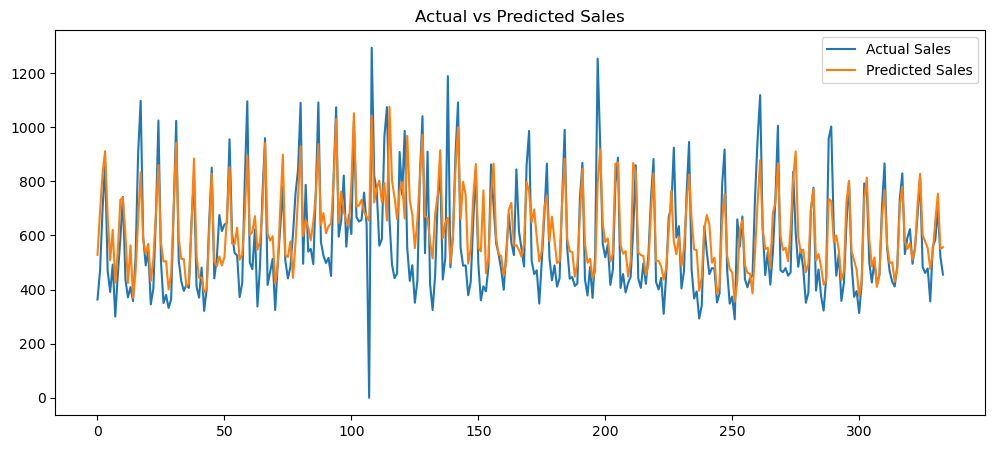

In [276]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.show()


In [277]:
coeffecients = pd.DataFrame({
    'Feature' : x.columns,
    'Coefficient' : model.coef_
})
print(coeffecients)



        Feature  Coefficient
0   sales_lag_1   -12.870715
1   sales_lag_7    47.004895
2  sales_lag_14    69.820537
3         ewm_7    85.587687
